# Exploratory Data Analysis (EDA)

## Aim of the Project:

In this project, I set out to build a model that can predict whether a borrower is likely to repay a loan or default (charge-off), based on historical loan data. The dataset includes borrower information and the loan outcome, which allows us to frame this as a binary classification problem. The goal is to use this model for assessing new loan applicants and estimating their likelihood of repayment. While developing the model, I paid close attention to relevant classification metrics to evaluate performance and ensure the results are meaningful and actionable in a real-world lending scenario.

## About the LendingClub Data Set:

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys

from project_package.exception.exception import ProjectException
from project_package.logging.logger import logging

%matplotlib inline

In [ ]:
try:
    df = pd.read_csv("../Input_Data_File/lending_club_loan_before_EDA.csv")
except Exception as e:
    raise ProjectException(e,sys)

In [9]:
#df.info

<Axes: xlabel='loan_status', ylabel='count'>

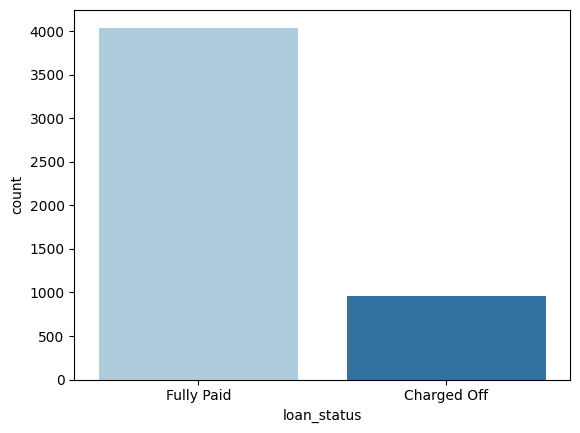

In [10]:
sns.countplot(x='loan_status', data=df, hue='loan_status', palette='Paired')

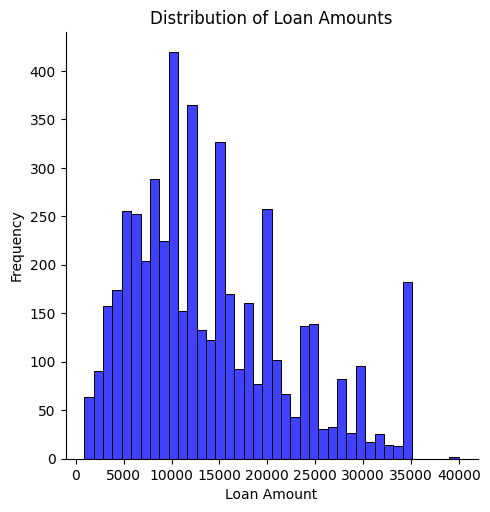

In [11]:
sns.displot(df['loan_amnt'], kde=False, bins=40, color='blue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [12]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_df = df[numerical_columns]
numerical_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.164069,0.951055,0.340729,0.042654,0.186570,-0.088156,0.350612,0.074616,0.224618,0.222791,-0.114292
int_rate,0.164069,1.000000,0.164327,-0.035859,0.172697,0.004989,0.087140,-0.013788,0.311421,-0.045031,-0.089294,0.078745
installment,0.951055,0.164327,1.000000,0.326010,0.035382,0.174944,-0.075611,0.331593,0.097025,0.198209,0.192672,-0.101360
annual_inc,0.340729,-0.035859,0.326010,1.000000,-0.188597,0.133768,-0.034322,0.325599,0.036472,0.197466,0.239765,-0.053497
dti,0.042654,0.172697,0.035382,-0.188597,1.000000,0.322021,-0.034449,0.161559,0.189901,0.247301,-0.025689,-0.039450
open_acc,0.186570,0.004989,0.174944,0.133768,0.322021,1.000000,-0.005400,0.262048,-0.130324,0.687401,0.120013,-0.029975
pub_rec,-0.088156,0.087140,-0.075611,-0.034322,-0.034449,-0.005400,1.000000,-0.131371,-0.083525,0.013485,0.021878,0.764675
revol_bal,0.350612,-0.013788,0.331593,0.325599,0.161559,0.262048,-0.131371,1.000000,0.257736,0.238603,0.240173,-0.144404
revol_util,0.074616,0.311421,0.097025,0.036472,0.189901,-0.130324,-0.083525,0.257736,1.000000,-0.099141,0.003262,-0.077788
total_acc,0.224618,-0.045031,0.198209,0.197466,0.247301,0.687401,0.013485,0.238603,-0.099141,1.000000,0.397388,0.015796


<Axes: >

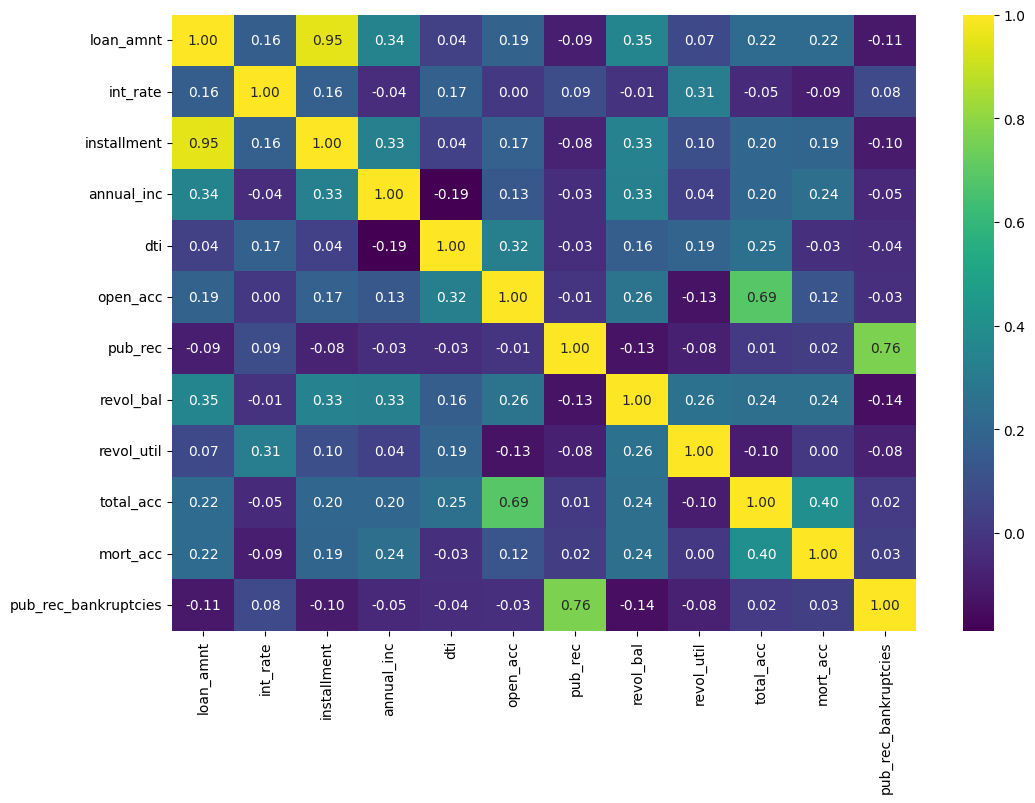

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt='.2f')

In [14]:
df.groupby('loan_status')['loan_amnt'].describe().T

loan_status,Charged Off,Fully Paid
count,957.000000,4042.000000
mean,14985.945664,13882.285997
std,8485.661267,8270.168843
min,1000.000000,900.000000
25%,8150.000000,7800.000000
50%,13250.000000,12000.000000
75%,20000.000000,19125.000000
max,35000.000000,40000.000000


<Axes: xlabel='grade', ylabel='count'>

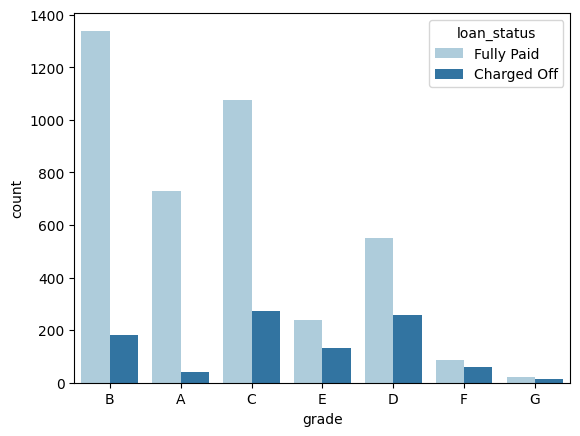

In [15]:
sns.countplot(x='grade', data=df, hue='loan_status', palette='Paired')

In [16]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
df[['loan_repaid', 'loan_status']].head(10)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
5,1,Fully Paid
6,1,Fully Paid
7,1,Fully Paid
8,1,Fully Paid
9,1,Fully Paid


C:\Users\MICROSOFT SURFACE\AppData\Local\Temp\ipykernel_14580\2179401464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['loan_repaid'] = df['loan_repaid']


<Axes: >

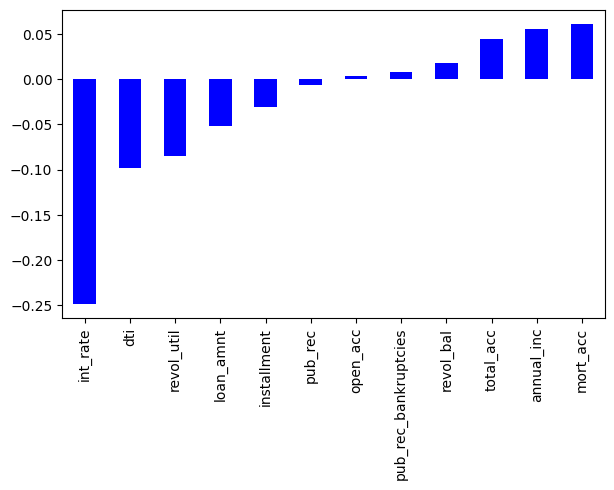

In [17]:
numerical_df['loan_repaid'] = df['loan_repaid']
numerical_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', figsize=(7, 4), color='blue')

## Missing Data:

In [18]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title               294
emp_length              235
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    20
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                3
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                439
pub_rec_bankruptcies      4
address                   0
loan_repaid               0
dtype: int64

In [19]:
# Percentage of the missing data in each column
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.881176
emp_length              4.700940
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.400080
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.060012
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                8.781756
pub_rec_bankruptcies    0.080016
address                 0.000000
loan_repaid             0.000000
dtype: float64


In [20]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ..., 'Butcher',
       'kelco laundry', 'Charter Communications'], dtype=object)

<Axes: xlabel='emp_title'>

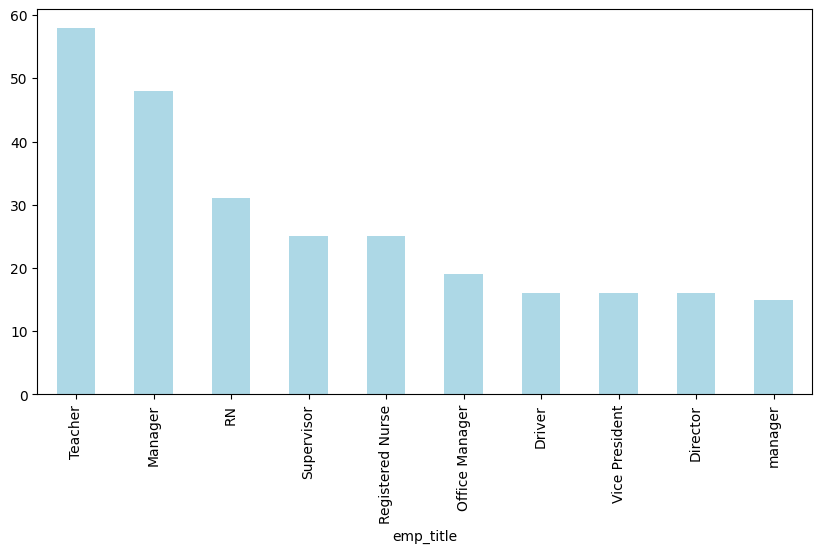

In [21]:
df['emp_title'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='lightblue')

As there are too many unique job titles to try to convert this to a dummy variable feature. Therefore, it is better to remove this feature:

In [22]:
df = df.drop('emp_title', axis=1)

In [23]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [24]:
emp_length_order = [
                    '< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years'
                    ]

<Axes: xlabel='emp_length', ylabel='count'>

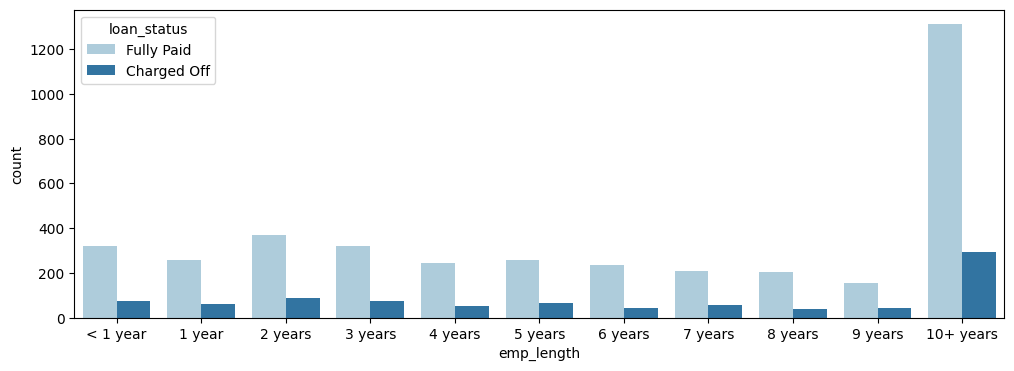

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status', palette='Paired')

In [26]:
# Here we calculate the percentage of charged off loans for each employment length category and order them based on emp_length_order
emp_length_counts = df['emp_length'].value_counts().reindex(emp_length_order, fill_value=0)
emp_length_charged_off = df[df['loan_status'] == 'Charged Off']['emp_length'].value_counts().reindex(emp_length_order, fill_value=0)
emp_length_percentage = (emp_length_charged_off / emp_length_counts) * 100
emp_length_percentage

emp_length
< 1 year     18.670077
1 year       19.435737
2 years      18.901099
3 years      19.289340
4 years      17.006803
5 years      20.000000
6 years      15.884477
7 years      21.804511
8 years      15.767635
9 years      22.388060
10+ years    18.368618
Name: count, dtype: float64

As there is no minigful differences between the the percentage of charged off loans for each employment length category, the missing values for this perticular category can be dropped as follows:

In [27]:
df = df.drop(columns=['emp_length'], axis=1)

In [28]:
df.isnull().sum()
missing_data = df.isnull().sum() / len(df) * 100
missing_data

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.400080
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.060012
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                8.781756
pub_rec_bankruptcies    0.080016
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

As the title column is only the description of the purpose column, we don't need it for the further evaluation by our ANN-based prediction model. Therefore, we can easily drop it as follows:

In [30]:
df = df.drop(columns=['title'], axis=1)

In [31]:
df.isnull().sum()
missing_data = df.isnull().sum() / len(df) * 100
missing_data

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.060012
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                8.781756
pub_rec_bankruptcies    0.080016
address                 0.000000
loan_repaid             0.000000
dtype: float64

<Axes: xlabel='mort_acc'>

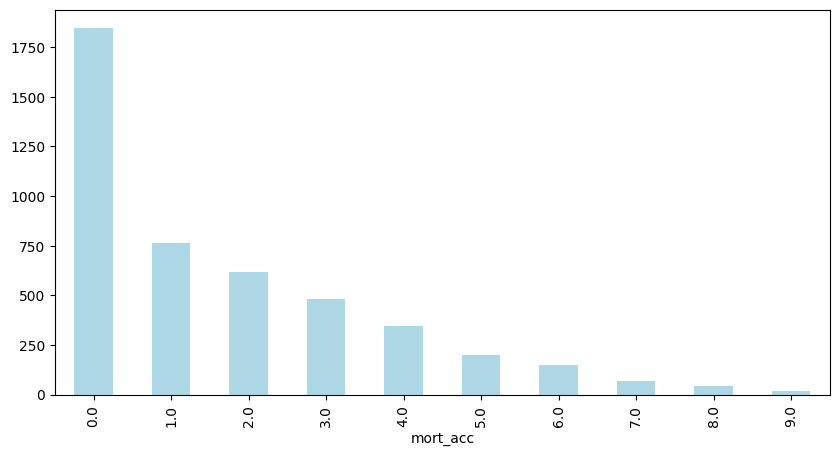

In [32]:
df['mort_acc'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='lightblue')

As we have valuable information in the column named "mot_acc (number of mortgage accounts)", we canno't simply drop the missing values, but we can check if there is a correlation between the features in this dataset with the number of mortgage accounts. If so, we can fill the missing values accordingly.

<Axes: >

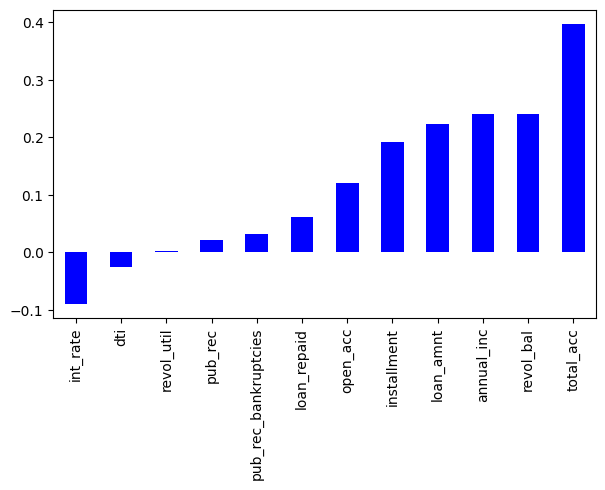

In [33]:
numerical_df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar', figsize=(7, 4), color='blue')

As the above plot shows, the number of mortgage accounts correlates well with the total accounts feature. Therefore, we can fill its missing values accodingly:

In [34]:
total_acc_avg = numerical_df.groupby('total_acc').mean()['mort_acc'].sort_values()

In [35]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [36]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [37]:
# I have only few missing values in the column 'mort_acc', so I drop them.
df = df.dropna(subset=['mort_acc'])
df.isnull().sum()


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              3
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    3
address                 0
loan_repaid             0
dtype: int64

In [38]:
# Similarly the missing value percentage of the columns "revol_util" and "pub_rec_bankruptcies" is very low, so we can drop them as well.
df = df.drop(columns=['revol_util', 'pub_rec_bankruptcies'], axis=1)
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

## Handling Categorical Data

In [39]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [40]:
df['term'].value_counts()

term
36 months    3849
60 months    1149
Name: count, dtype: int64

As important infomation of this feature is the numerical values, we can take them as the value of the feature:

In [41]:
df['term'].apply(lambda x: int(x.split()[0]))

0       36
1       36
2       36
3       36
4       60
        ..
4994    36
4995    36
4996    60
4997    36
4998    36
Name: term, Length: 4998, dtype: int64

In [42]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))
df['term'].value_counts()

term
36    3849
60    1149
Name: count, dtype: int64

As the feature "grade" is part of sub_grade, se we can just simply drop the "grade" feature:

In [43]:
df = df.drop(columns=['grade'], axis=1)

We can convert subgrade into dumy variables, and concatenate these new columns to the original dataframe, and drop the original subgrade column.

In [44]:
dummy_variables = pd.get_dummies(df['sub_grade'], drop_first=True)

In [45]:
df = pd.concat([df.drop(columns=['sub_grade'], axis=1), dummy_variables], axis=1)

In [46]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

Now, we can do the same for the remaning categorical features as follows:

In [47]:
dummy_variables = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]], drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)
df = pd.concat([df, dummy_variables], axis=1)

In [48]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [49]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

Now we can review the value_counts for the home_ownership column:

In [50]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    2455
RENT        2086
OWN          457
Name: count, dtype: int64

Now, we can convert these to dummy variables, but we replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe:

In [51]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummy_variables = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dummy_variables], axis=1)

In [52]:
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

Regarding the "address" feature, we can create a column called 'zip_code' that extracts the zip code from the address feature:

In [53]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

Now we make this zip_code column into dummy variables and concatenate the result and drop the original zip_code column along with dropping the address column:

In [54]:
dummy_variables = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code','address'], axis=1)
df = pd.concat([df,dummy_variables], axis=1)

In [55]:
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

Regarding to the "issue_d" (issue date) feature, it would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature:

In [56]:
df = df.drop('issue_d', axis=1)

In [57]:
df.select_dtypes(include=['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

"earliest_cr_line" feature appears to be a historical time stamp feature. So, we extract the year from this feature, then we can convert it to a numeric feature 'earliest_cr_year', and drop the earliest_cr_line feature:

In [58]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line', axis=1)


In [59]:
df.select_dtypes(include=['object']).columns

Index(['loan_status'], dtype='object')

Finally we can drop the "loan_status" feature as it is the a duplicate of the loan_repaid column:

In [61]:
df = df.drop('loan_status', axis=1)  

In [62]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

## Saving the data as a csv file:

In [65]:
df.to_csv("../Input_Data_File/lending_club_loan.csv", index=False)
